In [6]:
import os
import sys
# sys.path.append(r'C:\Users\ruro\OneDrive - Boskalis\Documents\python\ADV')
from vector import Vector
from datetime import datetime


In [7]:
# location of raw data
dataFolder = r'C:\Users\ruro\OneDrive - Boskalis\Documents\python\Hybrid_Dune\ADV\Deployment 1, until 23dec'
# name of the instantiated vector class
name = 'ADV_RWS1_Deployment1'
# start time over which to read data (must be larger than first recorded time)
tstart = '2024-12-16 13:00:00'
# stop time over which to read data (must be smaller than last recorded time)
tstop = '2024-12-23 13:00:00'

# make map 'raw_netcdf' in dataFolder and set this as output directory
ncOutDir = os.path.join(dataFolder, 'raw_netcdf')
if not os.path.exists(ncOutDir):
    os.makedirs(ncOutDir)


In [ ]:
# raw data to netcdf
vec = Vector(name, dataFolder, tstart=tstart, tstop=tstop)

# reads the raw data from tstart to tstop and casts all data in a pandas DataFrame that is stored under vec.dfpuv.
# in case there is no data between tstart and tstop the DataFrame is not instantiated
vec.read_raw_data()

# break up the data into burst blocks
vec.cast_to_blocks_in_xarray(blockWidth=1200) # 1200 seconds = 20 minutes

# compute burst averages (make sure to read vector.py what is happening exactly!)
vec.compute_block_averages()

# all data is collected in an xarray Dataset ds. We extract this from the class instantiation and
# we can easily write it to netCDF
ds = vec.ds

# add global attribute metadata
ds.attrs = {'Conventions': 'CF-1.6',
            'title': '{}'.format(vec.name),
            'instrument': '{}'.format('vec1'),
            'instrument serial number': '{}'.format(16725),
            'epsg': 28992,
             'x': 117196.6,
            'y': 559818.2,
            'time zone': 'UTC+2',
            'coordinate type': 'XYZ',
            'summary': 'hybrid-Dune field campaign',
            'contact person': 'Ruben Rosman ',
            'emailadres': 'r.g.c.rosman@student.tudelft.nl',
            'construction datetime': datetime.now().strftime("%d-%b-%Y (%H:%M:%S)"),
            'version': 'v1',
            'version comments': 'constructed with xarray'}

#specify compression for all the variables to reduce file size
comp = dict(zlib=True, complevel=5)
ds.encoding = {var: comp for var in ds.data_vars}

# save to netCDF
if not os.path.exists(ncOutDir):
    os.mkdir(ncOutDir)
ds.to_netcdf(ncOutDir + r'\{}.nc'.format(vec.name))
#

c:\Users\ruro\OneDrive - Boskalis\Documents\GitHub\HybridDune\Ruben\ADV\vector.py:219: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  self.burstStartTimes = pd.date_range(start = self.tstart,periods = nBursts,


.dat file was read


c:\Users\ruro\OneDrive - Boskalis\Documents\GitHub\HybridDune\Ruben\ADV\vector.py:288: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  timeSen = pd.date_range(start = self.tstart, periods = nSamples,


.sen file was read


c:\Users\ruro\OneDrive - Boskalis\Documents\GitHub\HybridDune\Ruben\ADV\vector.py:323: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df2 = df2.resample('{}S'.format(1/self.frequency)).asfreq()
c:\Users\ruro\OneDrive - Boskalis\Documents\GitHub\HybridDune\Ruben\ADV\vector.py:330: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df3 = df3.fillna(method='ffill')


In [10]:
ds

<xarray.Dataset> Size: 772MB
Dimensions:   (t: 168, N: 28720)
Coordinates:
  * t         (t) datetime64[ns] 1kB 2024-12-16T13:00:00 ... 2024-12-23T12:00:00
  * N         (N) float64 230kB 0.0 0.125 0.25 ... 3.59e+03 3.59e+03 3.59e+03
Data variables: (12/36)
    sf        float64 8B 8.0
    p         (t, N) float64 39MB 1.14e+03 680.0 800.0 1.14e+03 ... 0.0 0.0 0.0
    u         (t, N) float64 39MB 1.683 0.184 1.028 ... -2.435 1.335 1.845
    v         (t, N) float64 39MB 1.074 0.536 -0.521 ... -1.116 -1.089 -0.22
    w         (t, N) float64 39MB -0.089 -0.097 0.198 ... -0.631 0.235 0.162
    anl1      (t, N) float64 39MB 247.0 250.0 253.0 255.0 ... 0.0 0.0 0.0 0.0
    ...        ...
    snr1m     (t) float64 1kB 0.3201 0.3063 0.008583 ... 44.35 6.379 0.3758
    snr2m     (t) float64 1kB 1.805 1.433 1.643 1.305 ... 44.91 7.348 0.6421
    snr3m     (t) float64 1kB 1.028 1.046 0.9212 0.6612 ... 44.15 6.5 0.345
    headingm  (t) float64 1kB 207.6 208.2 195.3 189.0 ... 302.1 296.4 268.6
    pitchm    (t) float64 1kB 27.12 26.49 28.83 26.88 ... 3.451 2.411 -74.25
    rollm     (t) float64 1kB -12.51 -4.495 -23.58 ... 2.268 -0.01246 34.69
Attributes: (12/15)
    Conventions:               CF-1.6
    title:                     ADV_RWS1_Deployment1
    instrument:                vec1
    instrument serial number:  16725
    epsg:                      28992
    x:                         117196.6
    ...                        ...
    summary:                   hybrid-Dune field campaign
    contact person:            Ruben Rosman 
    emailadres:                r.g.c.rosman@student.tudelft.nl
    construction datetime:     12-Feb-2025 (11:08:43)
    version:                   v1
    version comments:          constructed with xarray

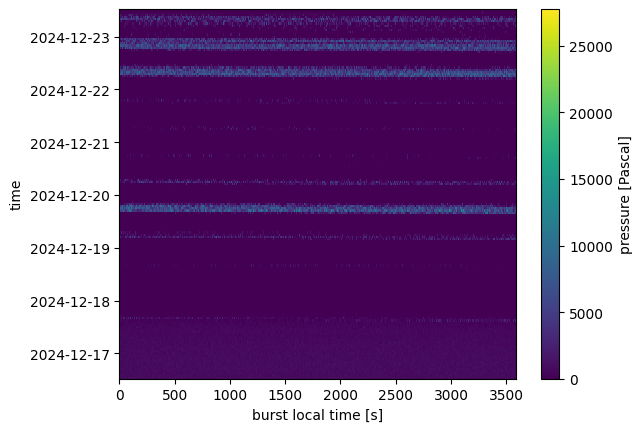

In [11]:
ds.p.plot()